In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [3]:
!unzip onehot_data.zip

Archive:  onehot_data.zip
  inflating: onehot_data.csv         


In [4]:
# 非必要，但用了會比較快
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(" Number of GPUs available: " , len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

 Number of GPUs available:  1


In [5]:
df = pd.read_csv('onehot_data.csv')

In [6]:
df = df.drop(columns=['Unnamed: 0'])

In [7]:
Y = df['status']
X = df.drop(columns=['status'])

In [8]:
Y

0         operating
1          acquired
2          acquired
3         operating
4         operating
            ...    
462646    operating
462647    operating
462648    operating
462649    operating
462650    operating
Name: status, Length: 462651, dtype: object

In [9]:
Y = [1 if i=='operating' else 0 for i in Y]# 1 True, 0 False

In [10]:
X = X.to_numpy()

In [11]:
Y = np.array(Y)

In [12]:
train_dataX, test_dataX, train_dataY, test_dataY = train_test_split(X, Y, train_size=0.8)

In [13]:
len(train_dataX), len(train_dataY), len(test_dataX), len(test_dataY)

(370120, 370120, 92531, 92531)

#Start Here

In [14]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 32
# learning rate
LR = 0.001

In [15]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(284,1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 283, 32)           96        
                                                                 
 flatten (Flatten)           (None, 9056)              0         
                                                                 
 dense (Dense)               (None, 64)                579648    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 579,809
Trainable params: 579,809
Non-trainable params: 0
_________________________________________________________________


In [17]:
#model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=LR, decay=0.0001), metrics=['accuracy'])

In [18]:
def show_train_history(train_history):

    fig , ax = plt.subplots()
    fig.subplots_adjust(hspace=0.4, wspace=0.4) #設定子圖的間隔
    fig.set_figwidth(14)

    ax1 = plt.subplot(1, 2, 1)
    plt.title("Accuracy")
    plt.plot(train_history.history['accuracy'],'-', label='accuracy')
    plt.plot(train_history.history['val_accuracy'],'-',  label='val_accuracy')
    leg = ax1.legend(loc='lower right') 
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')


    ax2 = plt.subplot(1, 2, 2)
    plt.title("Loss")
    plt.plot(train_history.history['loss'],'-', label='loss')
    plt.plot(train_history.history['val_loss'],'-', label='val_loss')
    leg = ax2.legend(loc='upper right') 
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.show()
     

In [19]:
X.shape, Y.shape

((462651, 284), (462651,))

In [20]:
train_history = model.fit(X, Y, batch_size=20, epochs=10, validation_split=0.2)

Epoch 1/10
18506/18506 [==============================] - 65s 3ms/step - loss: 10447976448.0000 - accuracy: 0.5095 - val_loss: 40.7074 - val_accuracy: 0.0635
Epoch 2/10
18506/18506 [==============================] - 57s 3ms/step - loss: 51707.4609 - accuracy: 0.8082 - val_loss: 0.1546 - val_accuracy: 0.9365
Epoch 3/10
18506/18506 [==============================] - 56s 3ms/step - loss: 0.5724 - accuracy: 0.9168 - val_loss: 0.1352 - val_accuracy: 0.9365
Epoch 4/10
18506/18506 [==============================] - 58s 3ms/step - loss: 9689.6875 - accuracy: 0.9239 - val_loss: 0.0760 - val_accuracy: 0.9365
Epoch 5/10
18506/18506 [==============================] - 58s 3ms/step - loss: 2.2466 - accuracy: 0.9437 - val_loss: 0.0751 - val_accuracy: 0.9365
Epoch 6/10
18506/18506 [==============================] - 57s 3ms/step - loss: 22.7410 - accuracy: 0.9608 - val_loss: 0.0569 - val_accuracy: 0.9365
Epoch 7/10
18506/18506 [==============================] - 58s 3ms/step - loss: 0.0438 - accuracy: 0

In [21]:
model.metrics_names

['loss', 'accuracy']

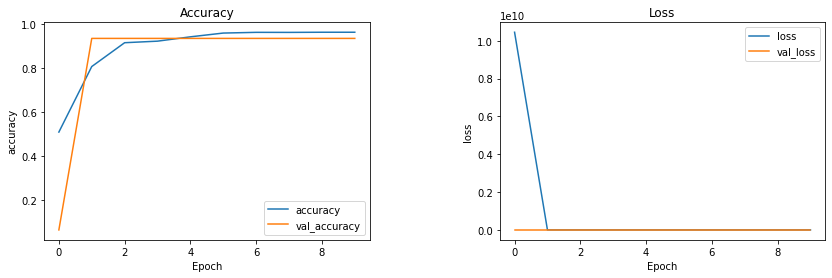

In [22]:
show_train_history(train_history)

In [28]:
train_history.history['accuracy']

[0.5094752907752991,
 0.8082162737846375,
 0.9168485999107361,
 0.9239246845245361,
 0.9436750411987305,
 0.9608397483825684,
 0.9641170501708984,
 0.963884711265564,
 0.9645736813545227,
 0.9645736813545227]

In [29]:
train_history.history['val_accuracy']

[0.06350304186344147,
 0.9364969730377197,
 0.9364969730377197,
 0.9364969730377197,
 0.9364969730377197,
 0.9364969730377197,
 0.9364969730377197,
 0.9364969730377197,
 0.9364969730377197,
 0.9364969730377197]

In [23]:
#predictY = model.predict(test_dataX)
#predictY

In [24]:
#predictY = [1 if i >= 0.5 else 0 for i in predictY]

In [25]:
#result = [predictY[i] == test_dataY[i] for i in range(len(predictY))]

In [26]:
#result.count(True) / len(result)